<center><h1>ML01: Projet Titanic</h1></center>

## Introduction

Le naufrage du RMS Titanic demeure l'une des catastrophes les plus tragiques de l'histoire. Le 15 avril 1912, lors de son voyage inaugural, le Titanic a sombré après avoir heurté un iceberg, entraînant la perte de 1502 vies parmi les 2224 passagers et membres d'équipage à bord. Cette tragédie a profondément choqué le monde entier et a conduit à des améliorations significatives des normes de sécurité maritime.

L'une des raisons principales pour lesquelles le nombre de victimes a été si élevé réside dans le manque de canots de sauvetage disponibles pour les passagers et l'équipage. Bien que la survie lors du naufrage ait été en partie due à la chance, certaines catégories de personnes ont eu une probabilité plus élevée de survie, notamment les femmes, les enfants et les passagers de la classe supérieure.

Notre objectif est de développer un modèle prédictif pour identifier les passagers ayant survécu à cette tragédie, en se basant sur divers facteurs et caractéristiques des individus.

<!-- Colocar uma imgaem de um link do titanico centralizada -->

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="500" height="500" />
</center>



| Variable  | Description                                    |
|-----------|------------------------------------------------|
| survival  | Survival (0 = No; 1 = Yes)                       |
| pclass    | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)      |
| name      | Name                                             |
| sex       | Sex                                              |
| age       | Age                                              |
| sibsp     | Number of Siblings/Spouses Aboard                |
| parch     | Number of Parents/Children Aboard                |
| ticket    | Ticket Number                                    |
| fare      | Passenger Fare                                   |
| cabin     | Cabin                                            |
| embarked  | Port of Embarkation   (C = Cherbourg; Q = Queenstown; S = Southampton)|


**NOTE EXPLICATIVE**

Pclass est une approximation du statut socio-économique (SSE).
 1er ~ supérieur ; 2ème ~ moyen ; 3ème ~ inférieur

L'âge est en années et est fractionnaire si l'âge est inférieur à un.
Si l'âge est estimé, il se présente sous la forme xx.5.

En ce qui concerne les variables de relations familiales (c.-à-d. sibsp et parch):certaines relations ont été ignorées.Par exemple, les autres membres de la famille exclus de cette étude sont les cousins,
neveux/nièces, tantes/oncles et beaux-parents.  Certains enfants ont voyagé uniquement avec une nounou, donc parch=0 pour eux.  De même, certains
ont voyagé avec des amis très proches ou des voisins dans un village, mais les définitions ne permettent pas d'établir de telles relation.
Donc les définitions utilisées pour sibsp et parch sont les suivantes:

* Frère ou sœur :  Frère, sœur, demi-frère ou demi-sœur d'un passager à bord du Titanic.
* Conjoint :   Mari ou femme du passager à bord du Titanic (les maîtresses et les fiancés sont ignorés).

* Parent :   Mère ou père du passager à bord du Titanic.

* Enfant : fils, fille, beau-fils ou belle-fille du passager à bord du Titanic.





## Imports des Librairies

In [2]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold




# Ignorer warnings
warnings.filterwarnings("ignore")


## Visualisation des données

In [3]:
df_data = pd.read_csv('train_titanic.csv')
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types des données par colonnes**


In [4]:
df_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Le type "object" est une chaîne de caractères pour pandas, ce qui pose des problèmes avec les algorithmes du machine learning.  Si nous voulons les utiliser comme caractéristiques, nous devrons les convertir en représentations numériques.

**Informations élémentaires**

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Gestion des Valeurs Manquantes dans notre Ensemble de Données**

Il apparaît que dans notre ensemble de données, les colonnes "Age", "Cabin" et "Embarked" contiennent des valeurs manquantes. La colonne "Cabin" a un grand nombre de valeurs manquantes, ce qui la rend difficile à utiliser de manière significative. Par conséquent, nous envisageons de supprimer complètement cette colonne de notre analyse.

Pour les colonnes "Age" et "Embarked", nous avons une approche différente. Les valeurs manquantes dans la colonne "Age" peuvent être estimées en utilisant des méthodes telles que la moyenne d'âge, la médiane, ou d'autres techniques d'imputation. Cela nous permettra de remplir ces valeurs manquantes avec des estimations raisonnables de l'âge des passagers.

Quant à la colonne "Embarked" (port d'embarquement), nous pouvons remplir les valeurs manquantes en utilisant la valeur la plus courante (le port le plus fréquent) ou en faisant une hypothèse informée basée sur notre connaissance des données.

En résumé, nous prévoyons de supprimer la colonne "Cabin" en raison du grand nombre de valeurs manquantes, et pour les colonnes "Age" et "Embarked", nous utiliserons des techniques d'imputation pour remplir les valeurs manquantes de manière à ce que notre analyse puisse se poursuivre de manière significative.

**Retirer les columns ID (inutiles) (Name, PassengerID, Ticket)


Generate various descriptive statistics on the DataFrame:

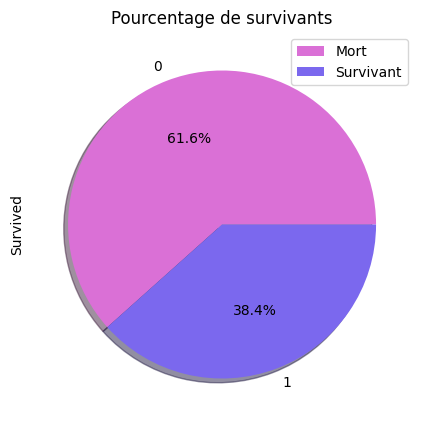

In [6]:

# Change les couleurs du graphique et ajoute un legende et ecrit un texte pour decrire le graphique

# graphique in pizza graphique in palette='hls'
df_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,5),colors=['orchid','mediumslateblue'])
plt.title('Pourcentage de survivants')
plt.legend(['Mort','Survivant'])

plt.show()




In [7]:
df_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Les informations fournies ci dessus sont un résumé statistique des données contenues dans notre base d'apprentissage.

* "count" indique le nombre d'observations pour chaque variable.

* "mean" représente la moyenne des valeurs pour chaque variable.

* "std" est l'écart type, une mesure de la dispersion des données autour de la moyenne.

* "min" et "max" correspondent aux valeurs minimales et maximales observées dans chaque variable.

* Les quartiles (25%, 50%, 75%) indiquent les valeurs qui séparent les données en quatre parties égales. Par exemple, le 25e percentile de l'âge est de 20,1 ans, ce qui signifie que 25 % des passagers ont un âge inférieur ou égal à 20,1 ans.


Ci après nous visualiserons nos données à l'aide de représentation graphique

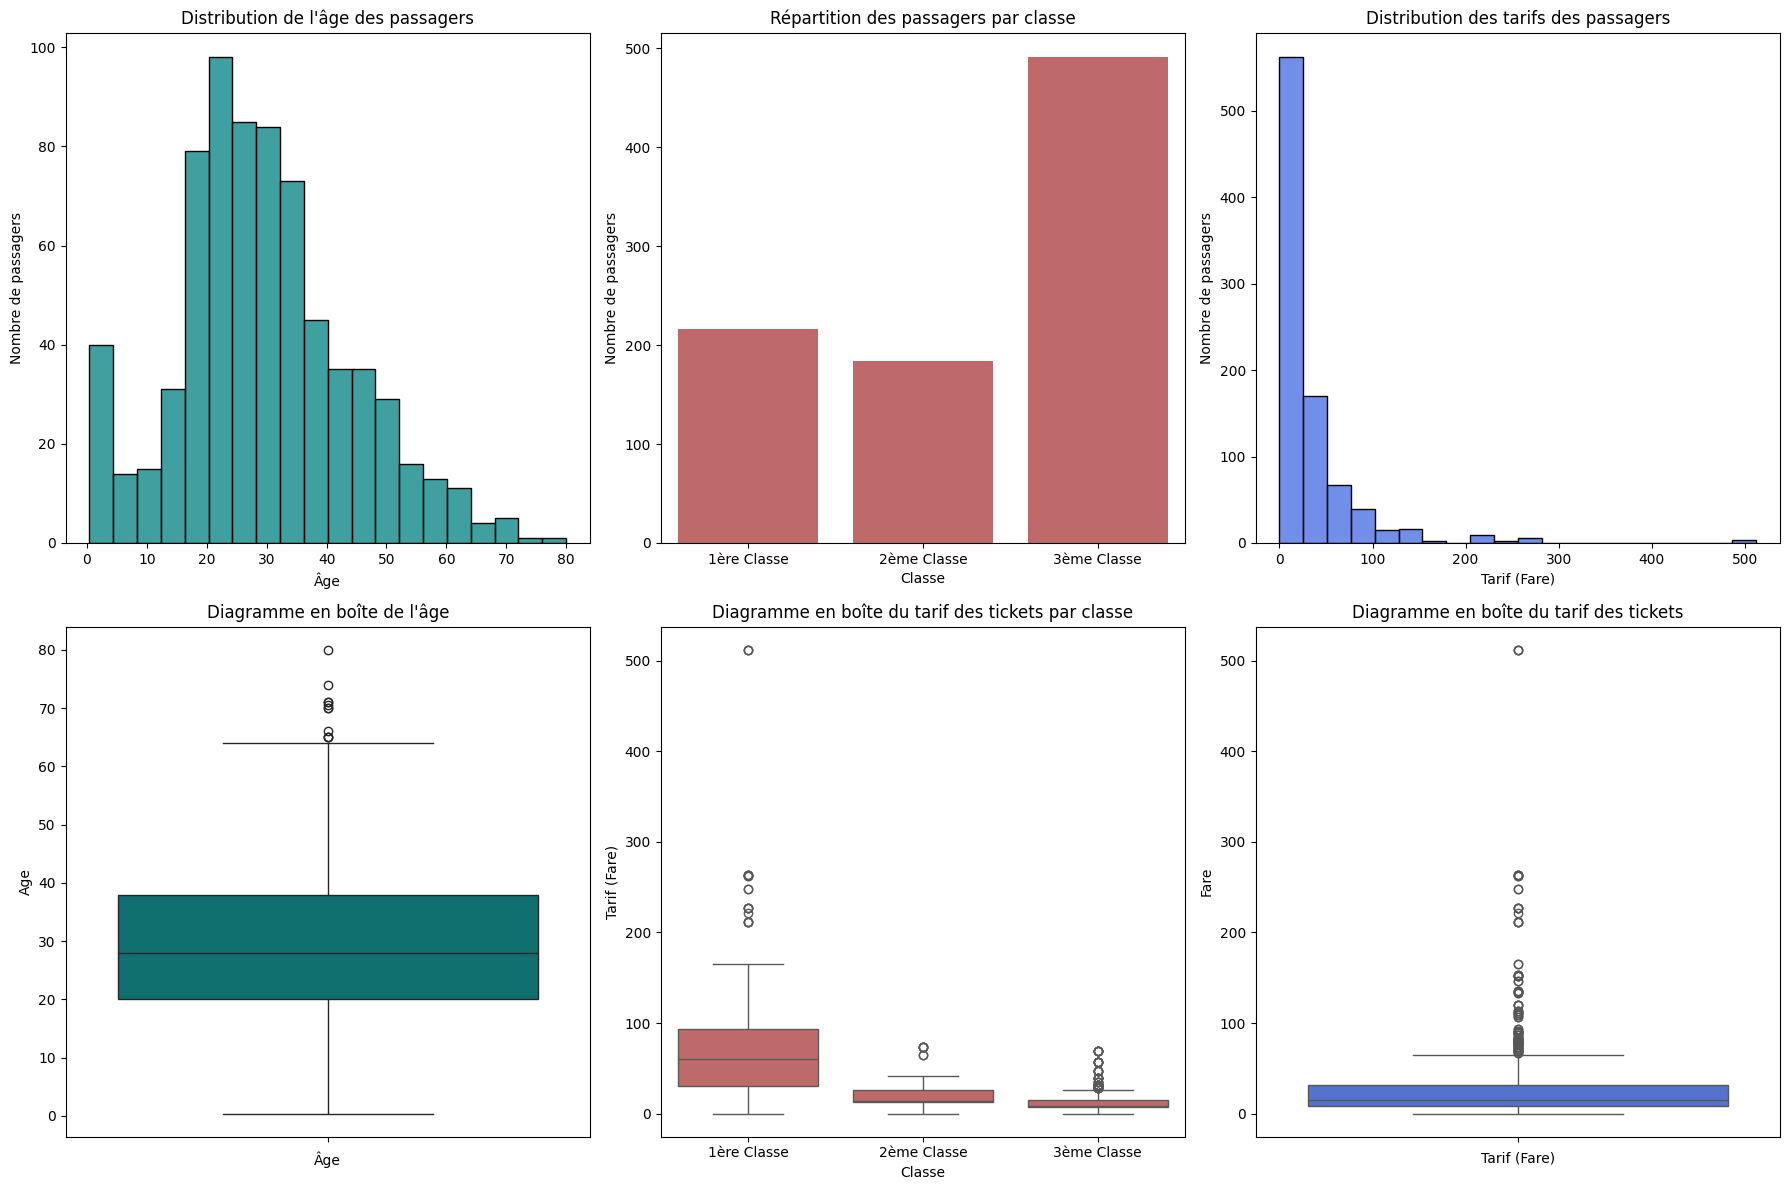

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure com layout mais adequado
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Rangée supérieure de graphiques
# Graphique de l'âge
sns.histplot(data=df_data, x='Age', bins=20, color='#008080', ax=axes[0, 0])
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Nombre de passagers')
axes[0, 0].set_title('Distribution de l\'âge des passagers')

# Graphique de la classe des passagers (Pclass)
class_counts = df_data['Pclass'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, color='#CD5C5C', ax=axes[0, 1])
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Nombre de passagers')
axes[0, 1].set_title('Répartition des passagers par classe')
axes[0, 1].set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])

# Graphique de fare
sns.histplot(data=df_data, x='Fare', bins=20, color='#4169E1', ax=axes[0, 2])
axes[0, 2].set_xlabel('Tarif (Fare)')
axes[0, 2].set_ylabel('Nombre de passagers')
axes[0, 2].set_title('Distribution des tarifs des passagers')

# Rangée inférieure de graphiques
# Diagramme en boîte de l'âge
sns.boxplot(data=df_data, y='Age', color='#008080', ax=axes[1, 0])
axes[1, 0].set_xlabel('Âge')
axes[1, 0].set_title('Diagramme en boîte de l\'âge')

sns.boxplot(data=df_data, x='Pclass', y='Fare', color='#CD5C5C', ax=axes[1, 1])
axes[1, 1].set_xlabel('Classe')
axes[1, 1].set_ylabel('Tarif (Fare)')
axes[1, 1].set_title('Diagramme en boîte du tarif des tickets par classe')
axes[1, 1].set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])

# Diagramme en boîte de Fare
sns.boxplot(data=df_data, y='Fare', color='#4169E1', ax=axes[1, 2])
axes[1, 2].set_xlabel('Tarif (Fare)')
axes[1, 2].set_title('Diagramme en boîte du tarif des tickets')

# Histogramme de Sex

# SibSp et Parch

plt.tight_layout()
plt.show()



Maintenant que nous avons une idée générale du contenu de l'ensemble de données, nous pouvons approfondir l'aperçu de chaque colonne.  Nous allons effectuer une analyse exploratoire des données et les "nettoyer" afin de définir les caractéristiques que nous utiliserons dans nos algorithmes de machine learning.





**Corrélation entre les variables**

Comprendre la matrice de corrélation des variables est essentiel pour analyser les relations entre les différentes caractéristiques d'un ensemble de données. Dans le graphique ci-dessus, une matrice de corrélation a été créée pour le dataframe "df_train." Cette matrice de corrélation permet de visualiser la force et la direction des relations linéaires entre les variables.

Les points clés à retenir à partir de la matrice de corrélation sont les suivants :

* **Valeurs de Corrélation** : Les valeurs se situent dans la plage de -1 à 1. Une valeur de 1 indique une corrélation positive parfaite, ce qui signifie que lorsque la variable A augmente, la variable B augmente également. Une valeur de -1 indique une corrélation négative parfaite, ce qui signifie que lorsque la variable A augmente, la variable B diminue. Une valeur proche de 0 suggère une faible corrélation.

* **Coloration** : Les couleurs dans la matrice de corrélation indiquent le degré de corrélation. Les tons plus clairs représentent une corrélation positive, tandis que les tons plus foncés représentent une corrélation négative.

*  **Annotations** : Les chiffres dans chaque cellule de la matrice indiquent la valeur de corrélation entre les variables correspondantes. Une annotation proche de 1 ou -1 indique une forte corrélation, tandis qu'une annotation proche de 0 indique une faible corrélation.

*  **Analyse des Relations** : En utilisant cette matrice, il est possible d'identifier quelles paires de variables sont fortement corrélées. Si deux variables ont une corrélation positive proche de 1, cela suggère qu'elles augmentent ensemble, tandis qu'une corrélation négative proche de -1 indique qu'elles évoluent en sens opposé. Par exemple, les variables "Sibp" et "Parch" sont les plus corrélées ainsi que les variables "Fare" et "Pclass".



<Axes: >

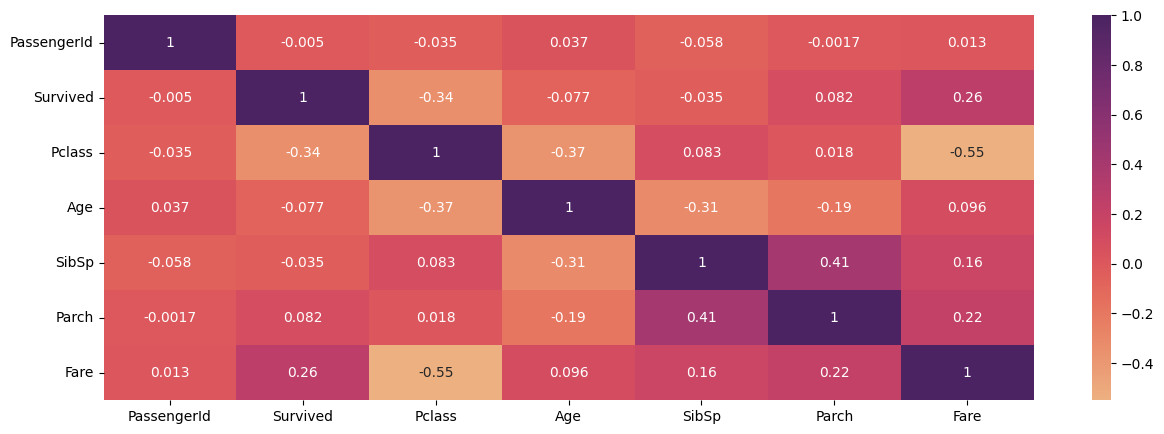

In [9]:
plt.figure(figsize=(15, 5))
custom_palette = sns.color_palette("flare", as_cmap=True)  # Substitua "coolwarm" pela paleta de cores desejada
sns.heatmap(df_data.corr(), annot=True, cmap=custom_palette)

<!-- Petit text pour parler sur les correlations entre noitre variable depedent (Survived et les autres) -->

À travers la carte de corrélation de notre base de données, nous pouvons identifier les variables ayant le plus grand impact et présentant une corrélation avec notre variable dépendante (Survived). Notamment, nous constatons que la variable dépendante ne montre pas de corrélation significative avec les autres variables indépendantes de notre base de données. Il est à noter que la corrélation la plus élevée identifiée concerne la variable Fare, avec un coefficient de 0,26

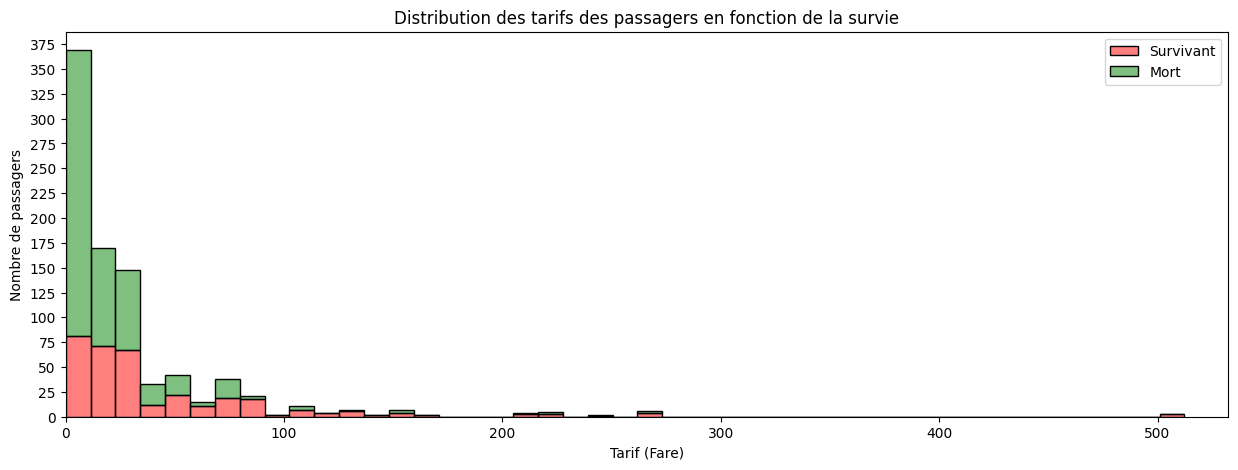

In [10]:
# graphique in histogram graphique avec la variable survived par chaque classe fare intervalle par rapport a survived
plt.figure(figsize=(15, 5))
plt.xlim(0, df_data['Fare'].max() + 20)
plt.yticks(np.arange(0, 500, 25))

sns.histplot(data=df_data, x='Fare', hue='Survived', bins=45, palette=['green','red'],alpha=0.5,multiple='stack')
plt.title('Distribution des tarifs des passagers en fonction de la survie')
plt.xlabel('Tarif (Fare)')
plt.ylabel('Nombre de passagers')
plt.legend(['Survivant','Mort'])
plt.show()


## Prétraitement des données

**Suppression des Colonnes "Name", "PassengerID", "Ticket"**

La suppression des colonnes 'Name', 'PassengerID'et 'Ticket' est justifiée par leur nature redondante et leur manque de pertinence pour notre analyse. Les noms des passagers, les identifiants uniques et les numéros de billets ne contiennent pas d'informations utiles pour notre étude car ce sont pour la plupart de simples identifiants. En les éliminant, nous simplifions notre jeu de données et pouvons nous concentrer sur les caractéristiques clés ayant un impact sur nos résultats.

In [11]:
df_data = df_data.drop (['Name','PassengerId','Ticket'], axis = 1)

**Gestion des Valeurs Manquantes dans notre Ensemble de Données**

Il apparaît que dans notre ensemble de données, les colonnes "Age", "Cabin" et "Embarked" contiennent des valeurs manquantes. En particulier, la colonne "Cabine" affiche un nombre significatif de valeurs manquantes, soit 687 au total, ce qui la rend difficile à utiliser de manière significative. Par conséquent, nous envisageons de supprimer complètement cette colonne de notre analyse.

Pour les colonnes "Age" et "Embarked", nous avons une approche différente. Les valeurs manquantes dans la colonne "Age" peuvent être estimées en utilisant des méthodes telles que la  la médiane. Cela nous permettra de remplir ces valeurs manquantes avec des estimations raisonnables de l'âge des passagers.

Quant à la colonne "Embarked" (port d'embarquement), nous pouvons remplir les valeurs manquantes en utilisant la valeur la plus courante (le port le plus fréquent) .

En résumé, nous prévoyons de supprimer la colonne "Cabin" en raison du grand nombre de valeurs manquantes, et pour les colonnes "Age" et "Embarked", nous utiliserons des techniques d'imputation pour remplir les valeurs manquantes de manière à ce que notre analyse puisse se poursuivre de manière significative.

In [12]:
# Vérifiez si la colonne Cabin existe, et si c'est le cas, supprimez-la
if 'Cabin' in df_data.columns:
    df_data = df_data.drop (['Cabin'], axis = 1)

# Remplacement des valeurs manquantes dans la colonne Age par la médiane
median_age = df_data['Age'].median()
df_data['Age'].fillna(median_age, inplace=True)

# Remplacement des valeurs manquantes dans la colonne Embarked par la valeur la plus fréquente
most_frequent_embarked = df_data['Embarked'].value_counts().index[0]
df_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB



**Transformation des Variables Qualitatives en Quantitatives :**

Dans le cadre de notre analyse de données, il est crucial de convertir les variables qualitatives en variables quantitatives. Les variables qualitatives, telles que le sexe et le port d'embarquement, sont des informations importantes, mais la plupart des algorithmes d'apprentissage automatique exigent que les données d'entrée soient numériques.

Pour que nos modèles puissent traiter ces informations, nous utilisons une approche de transformation. Plutôt que d'utiliser le LabelEncoder, qui attribue des identifiants numériques uniques à chaque catégorie des variables qualitatives, nous optons pour le One-Hot Encoding. Le One-Hot Encoding crée des colonnes binaires distinctes pour chaque catégorie, attribuant ainsi 0 ou 1 en fonction de la présence de la catégorie dans une observation. Par exemple, la variable 'Sex' avec les catégories 'Male' et 'Female' serait transformée en deux nouvelles colonnes 'Sex_Male' et 'Sex_Female'. Cette approche permet aux algorithmes de comprendre et d'utiliser ces données qualitatives de manière significative, sans introduire d'ordre artificiel entre les catégories.

In [13]:
df_data = pd.get_dummies(df_data, columns=["Sex", "Embarked"], prefix=["Sex", "Embarked"])

In [14]:
df_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Mise à l'échelle**

Elle est nécessaire pour garantir que les différentes variables caractéristiques de notre jeuu de données ont des échelles comparables. Sans mise à l'échelle, les caractéristiques qui ont des échelles très différentes peuvent biaiser négativement nos algorithmes d'apprentissage automatique, en particulier ceux qui se basent sur des mesures de distance ou qui effectuent des calculs numériques.

Lorsque des caractéristiques ont des échelles différentes, cela signifie que certaines d'entre elles peuvent avoir une influence disproportionnée sur les résultats de l'algorithme par rapport à d'autres caractéristiques. La mise à l'échelle permet de ramener toutes les caractéristiques à une même échelle, généralement avec une moyenne de 0 et un écart type de 1. Cela garantit que chaque caractéristique contribue de manière équilibrée aux calculs, améliorant ainsi la performance et l'interprétabilité des modèles d'apprentissage automatique.



In [15]:
# Création d'une instance de StandardScaler
std = StandardScaler()

# Sélection des colonnes 'Age' et 'Fare' à mettre à l'échelle
columns = ['Age', 'Fare']

# Mise à l'échelle des données 'Age' et 'Fare' de df_train
scaled = std.fit_transform(df_data[['Age', 'Fare']])

# Création d'un nouveau DataFrame avec les données mises à l'échelle
scaled = pd.DataFrame(scaled, columns=columns)

# Suppression des colonnes 'Age' et 'Fare' du DataFrame df_train
df = df_data.drop(columns=columns, axis=1)

# Fusion des données mises à l'échelle avec le DataFrame d'origine
df = df.merge(scaled, left_index=True, right_index=True, how="left")

# Affichage des premières lignes du DataFrame résultant
df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,0,0,1,0,0,1,-0.565736,-0.502445
1,1,1,1,0,1,0,1,0,0,0.663861,0.786845
2,1,3,0,0,1,0,0,0,1,-0.258337,-0.488854
3,1,1,1,0,1,0,0,0,1,0.433312,0.420730
4,0,3,0,0,0,1,0,0,1,0.433312,-0.486337


**Division de la base de données en base d'apprentissage et de test**

Nous divisons l'ensemble de données en deux ensembles distincts : l'ensemble d'entraînement et l'ensemble de test. L'ensemble d'entraînement est utilisé pour former le modèle, tandis que l'ensemble de test est réservé pour évaluer sa performance. Cette séparation est essentielle pour simuler la manière dont le modèle se comportera sur de nouvelles données inconnues. En effet, l'objectif est de s'assurer que le modèle peut généraliser ses connaissances au-delà des données sur lesquelles il a été formé.

Avec la séparation des données en ensembles d'entraînement et de test, nous appliquons des techniques de validation croisée pendant la modélisation. En fin de compte, nous utilisons l'ensemble de test pour l'évaluation. Cette procédure aide à prévenir le surajustement aux données de test, offrant ainsi une évaluation plus réaliste des performances du modèle sur de nouvelles données

In [25]:
# Court texte expliquant les fonctions ci-dessous

YRdf = pd.DataFrame(df['Survived'])
YR = np.array(YRdf).ravel() + 1

X = df.drop(['Survived'], axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.ravel() + 1

K = int(np.max(YR))
L = np.ones((K,K)) - np.eye(K)


In [41]:
# Expliquant que nous avons un fichier avec les fonctions qui seront utilisées pour analyser les données
run functions.ipynb

## K-Nearest-Neighbours (KNN)

Nous allons maintenant utiliser le classificateur KNN (K-Nearest Neighbors), une technique d'apprentissage supervisé. Le KNN est un algorithme qui classe un point de données en fonction de la majorité des classes de ses voisins les plus proches. En résumé, il prend en compte la proximité entre les données pour effectuer des prédictions. Dans notre approche, nous intégrerons la validation croisée pour évaluer les performances du modèle et déterminer la meilleure configuration de voisins les plus proches qui s'adapte aux données.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_kn = np.array([1, 10, 20, 30, 40, 50, 100])
nb_kn = stock_kn.shape[0]
stock_average_risk_Train = np.zeros((nbFolds, nb_kn))
stock_average_risk_Val = np.zeros((nbFolds, nb_kn))

min_diff_kn = None
min_diff = float('inf')

for f, (train, val) in enumerate(kfSplit):
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    for t, kn in enumerate(stock_kn):
        model_KNN = KNeighborsClassifier(n_neighbors=kn, metric='euclidean')
        model_KNN.fit(XTrain, YRTrain.ravel())

        YhatTrainKNN = model_KNN.predict(XTrain)
        stock_average_risk_Train[f, t] = compute_average_risk(YRTrain, YhatTrainKNN, K, L)

        YhatValKNN = model_KNN.predict(XVal)
        stock_average_risk_Val[f, t] = compute_average_risk(YRVal, YhatValKNN, K, L)

        # Track the minimum difference between training and validation curves
        diff = abs(np.mean(stock_average_risk_Train, 0)[t] - np.mean(stock_average_risk_Val, 0)[t])
        if diff < min_diff:
            min_diff = diff
            min_diff_kn = kn

### Analyse des résultats KNN

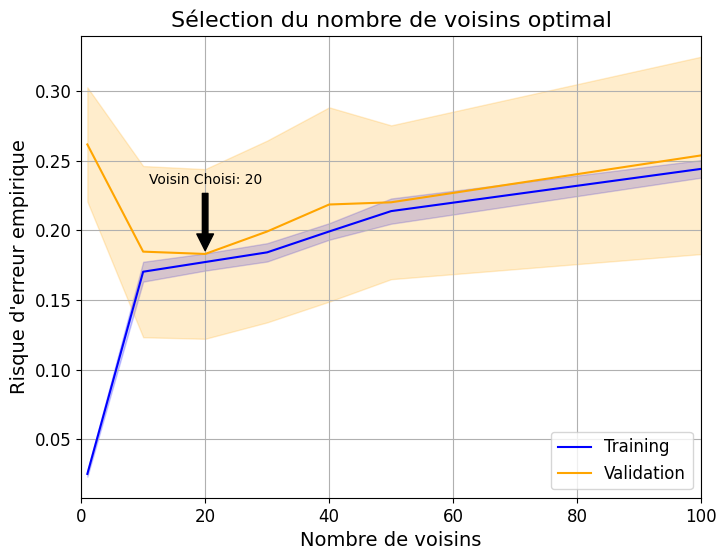

In [27]:
# Plot the results using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=stock_kn, y=np.mean(stock_average_risk_Train, 0), label='Training', color='blue')
sns.lineplot(x=stock_kn, y=np.mean(stock_average_risk_Val, 0), label='Validation', color='orange')

plt.fill_between(stock_kn,
                 np.mean(stock_average_risk_Train, 0) - np.std(stock_average_risk_Train, 0),
                 np.mean(stock_average_risk_Train, 0) + np.std(stock_average_risk_Train, 0),
                 color='blue', alpha=0.2)

plt.fill_between(stock_kn,
                 np.mean(stock_average_risk_Val, 0) - np.std(stock_average_risk_Val, 0),
                 np.mean(stock_average_risk_Val, 0) + np.std(stock_average_risk_Val, 0),
                 color='orange', alpha=0.2)

# Find the index of the minimum difference
min_diff_index = np.argmin(np.abs(np.mean(stock_average_risk_Train, 0) - np.mean(stock_average_risk_Val, 0)))
min_diff_kn = stock_kn[min_diff_index]

# Annotate the point with the minimum difference
plt.annotate(f'Voisin Choisi: {min_diff_kn}',
             xy=(min_diff_kn, np.mean(stock_average_risk_Val, 0)[min_diff_index]),
             xytext=(min_diff_kn, np.mean(stock_average_risk_Val, 0)[min_diff_index] + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='center')

plt.xlim(0, np.max(stock_kn))

plt.xlabel("Nombre de voisins", fontsize=14)
plt.ylabel("Risque d'erreur empirique", fontsize=14)
plt.title("Sélection du nombre de voisins optimal", fontsize=16)
plt.legend(fontsize=12, loc='lower right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

Nous avons utilisé la validation croisée pour évaluer les performances du modèle et déterminer la meilleure configuration de voisins les plus proches qui s'adapte aux données. Le graphique ci-dessus montre les résultats de la validation croisée pour différentes valeurs de k. Nous constatons que la valeur optimale de k est de 20

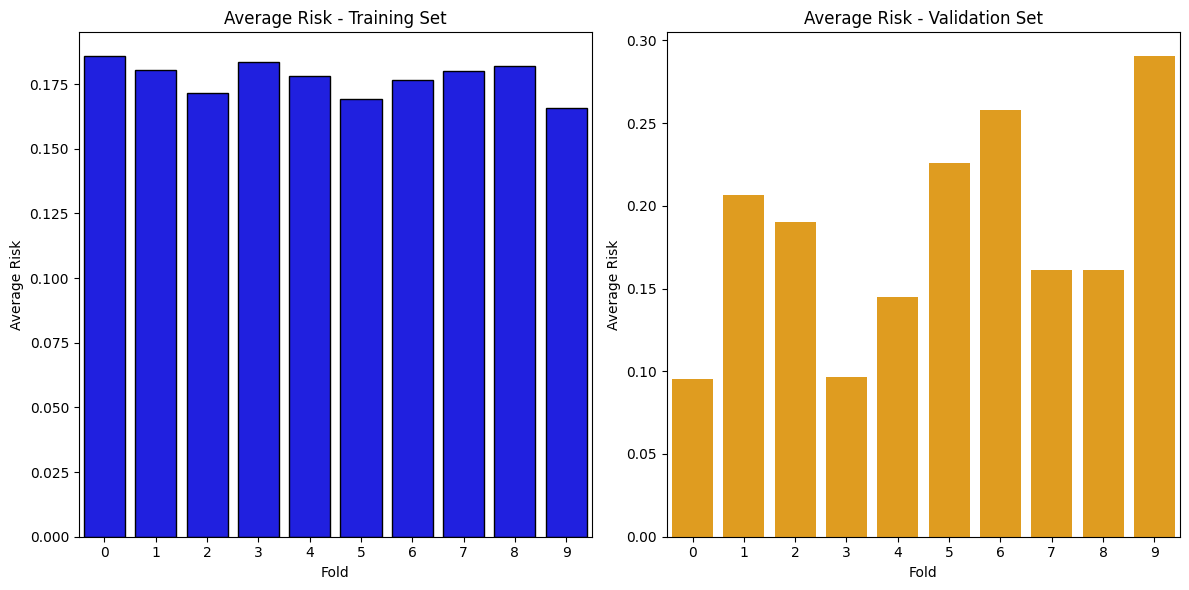

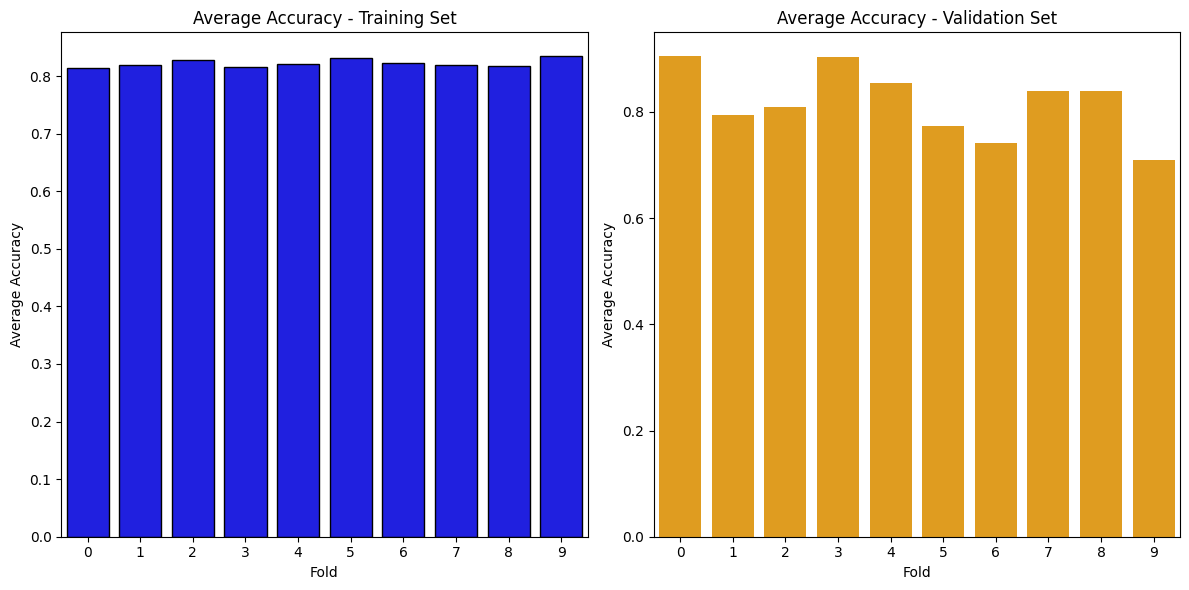

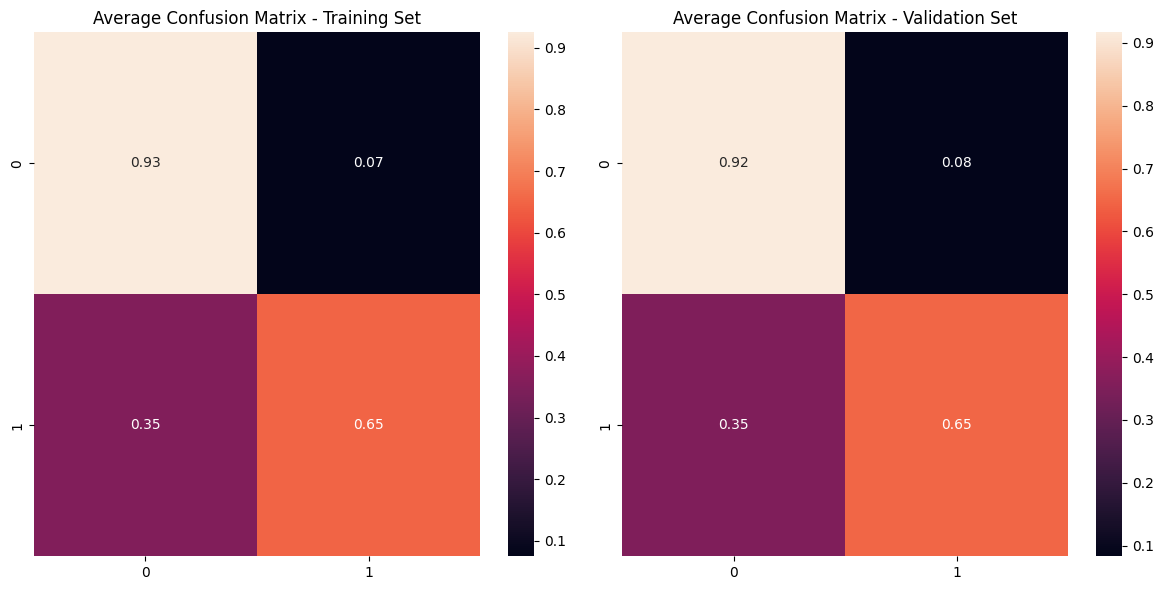

In [48]:
np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train = np.zeros((nbFolds, 1))
stock_average_risk_Val = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train = np.zeros((nbFolds, K))
stock_RiskPerClass_Val = np.zeros((nbFolds, K))

stock_Accuracy_Train = np.zeros(nbFolds)
stock_Accuracy_Val = np.zeros(nbFolds)

stock_AccPerClass_Train = np.zeros((nbFolds, K))
stock_AccPerClass_Val = np.zeros((nbFolds, K))

stock_ConfMat_Train = np.zeros((nbFolds, K, K))
stock_ConfMat_Val = np.zeros((nbFolds, K, K))

f = 0
kn = 20

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    model_KNN = KNeighborsClassifier(n_neighbors=kn, metric='euclidean')
    model_KNN.fit(XTrain, YRTrain.ravel())

    # Prediction on the training samples
    YhatTrainKNN = model_KNN.predict(XTrain)
    stock_average_risk_Train[f, 0] = compute_average_risk(YRTrain, YhatTrainKNN, K, L)
    stock_RiskPerClass_Train[f, :] = compute_risk_per_class(YRTrain, YhatTrainKNN, K, L)
    stock_Accuracy_Train[f] = compute_accuracy(YRTrain, YhatTrainKNN)
    stock_AccPerClass_Train[f, :] = compute_accuracy_per_class(YRTrain, YhatTrainKNN, K)
    stock_ConfMat_Train[f, :, :] = compute_confusion_matrix(YRTrain, YhatTrainKNN, K)

    # Prediction on the testing samples
    YhatValKNN = model_KNN.predict(XVal)
    stock_average_risk_Val[f, 0] = compute_average_risk(YRVal, YhatValKNN, K, L)
    stock_RiskPerClass_Val[f, :] = compute_risk_per_class(YRVal, YhatValKNN, K, L)
    stock_Accuracy_Val[f] = compute_accuracy(YRVal, YhatValKNN)
    stock_AccPerClass_Val[f, :] = compute_accuracy_per_class(YRVal, YhatValKNN, K)
    stock_ConfMat_Val[f, :, :] = compute_confusion_matrix(YRVal, YhatValKNN, K)

    f = f + 1


#  plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# plot average accuracy avec la moyenne de tout les fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')


plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# heatmap average confusion matrix
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()

Petit text pour parler sur les resultats de notre model KNN

## Classifieur de Bayes Naïf CNB


In [ ]:
# Apprentissage Classifieur Naïf de Bayes :
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

CNB = GaussianNB()
CNB.fit(X_train,y_train)

#faire une figure qui affiche les frontieres de decision




# Évaluer la performance du modèle
y_pred = CNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Exactitude du modèle : {accuracy}")
print("Matrice de confusion :")
print(conf_matrix)



#tentative de valisation croisee

# Créez une instance de classifieur de Bayes naïf
CNB = GaussianNB()

# Définissez les hyperparamètres que vous souhaitez tester
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)
}

# Créez une grille de recherche pour tester différents hyperparamètres
grid_search = GridSearchCV(CNB, param_grid, cv=6, scoring='accuracy')

# Effectuez la validation croisée avec la grille de recherche
grid_search.fit(X_train, y_train)

# Obtenez les meilleurs paramètres directement à partir de grid_search après ajustement
best_params = grid_search.best_params_

# Obtenez également le meilleur score de validation croisée
best_score = grid_search.best_score_

print(f"Meilleur score de validation croisée : {best_score}")
print(f"Meilleurs paramètres : {best_params}")

# Créez un classifieur de Bayes naïf avec les meilleurs paramètres
best_CNB = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Entraînez le modèle sur l'ensemble d'entraînement
best_CNB.fit(X_train, y_train)

# Évaluez la performance du modèle sur l'ensemble de test
y_pred = best_CNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Exactitude du modèle : {accuracy}")
print("Matrice de confusion :")
print(conf_matrix)


Exactitude du modèle : 0.8022388059701493
Matrice de confusion :
[[129  28]
 [ 25  86]]
Meilleur score de validation croisée : 0.7817867811799851
Meilleurs paramètres : {'var_smoothing': 1e-05}
Exactitude du modèle : 0.8022388059701493
Matrice de confusion :
[[129  28]
 [ 25  86]]
